<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/test_accuracy_annotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
# import stanfordnlp
# import import_ipynb
import json
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
os.chdir("/content/gdrive/My Drive/Colab Notebooks/CAPSTONE")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
property_ = "speaking"
file1 = open("gables_{}withtoken_list.txt".format(property_), "r")

sentences_gables = []

target_pre_gables = []

file1_lines =file1.readlines()

for i in range(len(file1_lines)):
  if i%2==0:
    sentences_gables.append(file1_lines[i])
  else:
    target_pre_gables.append(file1_lines[i])

    
# for i in range(len(file2_lines)):
#   if i%2==0:
#     sentence_dreams.append([file2_lines[i]])
#   else:
#     target_dreams.append([int(file2_lines[i])])
# file.close()

In [0]:
file = open("montgomery.gables.tokens")
tokens = pd.read_csv("montgomery.gables.tokens", sep="\t")

In [0]:
tokenids = [int(sentences_gables[i][:-2][re.search("\d", sentences_gables[i][:-2]).span()[0]:]) for i in range(len(sentences_gables))]
sentence_by_id = [sentences_gables[i][:-2][1:re.search("\d", sentences_gables[i][:-2]).span()[0]] for i in range(len(sentences_gables))]
# target_pre_gables

In [0]:
# anno_frame = pd.DataFrame({"tokenids": tokenids, "sentences": sentence_by_id, "targets": target_pre_gables})
# anno_frame = anno_frame.sample(frac=1).reset_index(drop=True)
# anno_frame.to_csv("shuffled_annotable_gables.csv")

In [0]:
anno_frame = pd.read_csv("shuffled_annotable_gables.csv")

In [0]:
def annotate_helper(i):
  token = anno_frame.iloc[i]["tokenids"]
  return tokens[tokens["paragraphId"]==int(tokens[tokens["tokenId"]==token]["paragraphId"])]["originalWord"], tokens[tokens["sentenceID"]==int(tokens[tokens["tokenId"]==token]["sentenceID"])]["originalWord"]

In [0]:
annotate_helper(104)

(1046          “
 1047          I
 1048        ’ll
 1049       just
 1050       step
          ...   
 1174         of
 1175    Avonlea
 1176      today
 1177          .
 1178          ”
 Name: originalWord, Length: 133, dtype: object, 1076            “
 1077           He
 1078         does
 1079          n’t
 1080    generally
 1081           go
 1082           to
 1083         town
 1084         this
 1085         time
 1086           of
 1087         year
 1088          and
 1089           he
 1090            _
 1091        never
 1092            _
 1093       visits
 1094            ;
 1095           if
 1096           he
 1097           ’d
 1098          run
 1099          out
 1100           of
 1101       turnip
 1102         seed
 1103           he
 1104        would
 1105          n’t
 1106        dress
 1107           up
 1108          and
 1109         take
 1110          the
 1111        buggy
 1112           to
 1113           go
 1114          for
 1115         more
 1116

In [0]:
target_true_gables = ["Anne", "Marilla", "Marilla", "Anne", "Anne", "Anne", "Anne", "Anne", "Matthew", "Anne", "Marilla", "Jane", "Anne", "z", "Anne", 
                     "Diana", "Diana", "Mr. Phillips", "Marilla", "Marilla", "Diana", "Marilla", "Marilla", "Josie Pye", "Anne", "Matthew", "Gilbert",
                     "Marilla", "Marilla", "z", "Diana", "Anne", "Mrs. Barry", "Jane", "Anne", "Anne", "Anne", "Mrs. Barry", "Matthew", "Marilla", 
                     "Anne", "Matthew", "Marilla", "Anne", "Marilla", "Josie Pye", "Mrs. Lynde", "Diana", "Mrs. Spencer", "Anne", "Anne", "Anne", "Marilla", 
                     "Marilla", "Marilla", "Anne", "Marilla", "Mrs. Lynde", "Anne", "Mrs. Lynde", "Anne", "Anne", "Anne", "Anne", "z", "Anne", "Anne",
                     "Anne", "Anne", "Marilla", "Anne", "Mrs. Lynde", "Matthew", "Anne", "Anne", "Marilla", "Marilla", "Matthew", "Marilla", "Anne", "Anne", 
                     "Marilla", "Anne", "Anne", "Mrs. Lynde", "Mrs. Spencer", "Matthew", "Matthew", "Marilla", "Marilla", "Anne", "Mrs. Lynde", 
                     "Anne", "Anne", "Anne", "Marilla", "Marilla", "Mrs. Allan", "Matthew", "Anne", 
                     "Anne", "Anne", "Marilla", "Anne", "Mrs. Lynde", "Matthew", 
                      "Anne", "Anne", "Marilla", "Anne", "Mrs. Spencer", "Diana", "Gilbert", "Anne", "Anne", "Matthew", "Marilla", "Anne", "Marilla", 
                      "Anne", "Matthew", "Diana", "Anne", "Anne", "Diana", "Marilla", "Anne", "Marilla", "Anne", "Josie Pye", "Anne", "Anne", "Anne", "Mrs. Lynde",
                      "Anne", "Marilla", "Marilla", "Anne", "Mrs. Lynde", "z", "Anne", "Anne", "Marilla", "Matthew", "Marilla", "Anne", "Marilla", "Diana", 
                      "Anne", "Matthew"]

In [0]:
# len(["Anne", "Marilla", "Marilla", "Anne", "Anne", "Anne", "Anne", "Anne", "Matthew", "Anne", "Marilla", "Jane", "Anne", "-1", "Anne", 
#                      "Diana", "Diana", "Mr. Philips", "Marilla", "Marilla", "Diana", "Marilla", "Marilla", "Josie", "Anne", "Matthew", "Gilbert",
#                      "Marilla", "Marilla", "-1", "Diana", "Anne", "Mrs. Barry", "Jane", "Anne", "Anne", "Anne", "Mrs. Barry", "Matthew", "Marilla", 
#                      "Anne", "Matthew", "Marilla", "Anne", "Marilla", "Josie", "Mrs. Lynde", "Diana", "Mrs. Spencer", "Anne", "Anne", "Anne", "Marilla", 
#                      "Marilla", "Marilla", "Anne", "Marilla", "Mrs. Lynde", "Anne", "Mrs. Lynde", "Anne", "Anne", "Anne", "Anne", "-1", "Anne", "Anne",
#                      "Anne", "Anne", "Marilla", "Anne", "Mrs. Lynde", "Matthew", "Anne", "Anne", "Marilla", "Marilla", "Matthew", "Marilla", "Anne", "Anne", 
#                      "Marilla", "Anne", "Anne", "Mrs. Lynde", "Mrs. Spencer", "Matthew", "Matthew", "Marilla", "Marilla", "Anne", "Mrs. Lynde", 
#                      "Anne", "Anne", "Anne", "Marilla", "Marilla", "Mrs. Allan", "Matthew", "Anne"])

In [0]:
def accuracy_checker(target_pre, target_true, n):
  total_corr = 0
  if len(target_pre[:n])!=len(target_true):
    print("mismatched lengths, check")
  for i in range(len(target_pre[:n])):
    if target_true[i] in target_pre[i].split(","):
      total_corr+=1
  return total_corr/n, target_true.count("Anne")/len(target_true)

In [0]:
accuracy_checker(list(anno_frame["targets"]), target_true_gables, 150)

(0.7266666666666667, 0.4266666666666667)

In [0]:
# len(["Anne", "Marilla", "Marilla", "Anne", "Anne", "Anne", "Anne", "Anne", "Matthew", "Anne", "Marilla", "Jane", "Anne", "-1", "Anne", 
#                      "Diana", "Diana", "Mr. Philips", "Marilla", "Marilla", "Diana", "Marilla", "Marilla", "Josie", "Anne", "Matthew", "Gilbert",
#                      "Marilla", "Marilla", "-1", "Diana", "Anne", "Mrs. Barry", "Jane", "Anne", "Anne", "Anne", "Mrs. Barry", "Matthew", "Marilla", 
#                      "Anne", "Matthew", "Marilla", "Anne", "Marilla", "Josie", "Mrs. Lynde", "Diana", "Mrs. Spencer", "Anne", "Anne", "Anne", "Marilla", 
#                      "Marilla", "Marilla", "Anne", "Marilla", "Mrs. Lynde", "Anne", "Mrs. Lynde", "Anne", "Anne", "Mrs. Allan"])

In [0]:
print(150/len(anno_frame))

0.1282051282051282


In [0]:
ch = []
n = []
for i in target_true_gables:
  if i not in ch:
    ch.append(i)
    n.append(target_true_gables.count(i)/150)

In [0]:
alph_tuple = sorted(zip(ch,n), key=lambda pair: pair[0])
ch = [i[0] for i  in alph_tuple]
n = [i[1] for i in alph_tuple]

Text(0.5, 1.0, "Proportion of each character's true quotations")

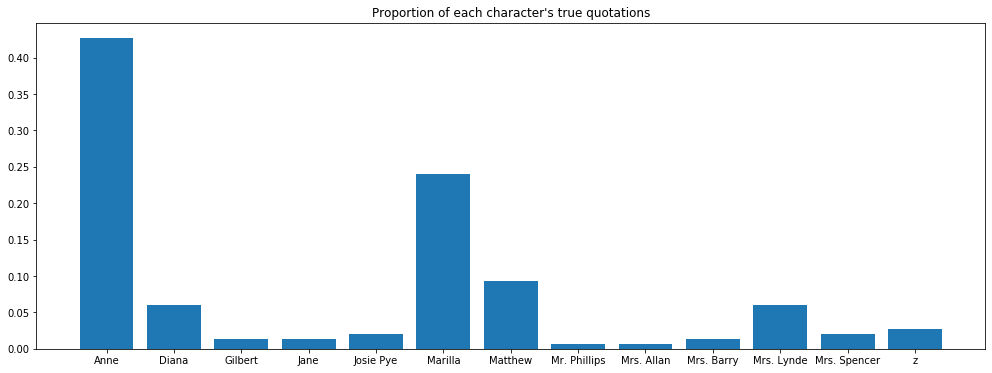

In [0]:
plt.figure(figsize=(17, 6))
plt.bar(ch, n)
plt.title("Proportion of each character's true quotations")

In [0]:
ch_pr = []
n_pr = []
for i in anno_frame["targets"][:150]:
  in_now = False
  for e in i.split(","):
    if e in ch_pr:
      in_now = True
  if in_now == False:
    ch_pr.append(i.split(",")[1])
    n_pr.append(list(anno_frame["targets"][:150]).count(i)/150)

In [0]:
alph_tuple_pr = sorted(zip(ch_pr,n_pr), key=lambda pair: pair[0])
ch_pr = [i[0] for i  in alph_tuple_pr]
n_pr = [i[1] for i in alph_tuple_pr]

Text(0.5, 1.0, "Proportion of each character's predicted quotations")

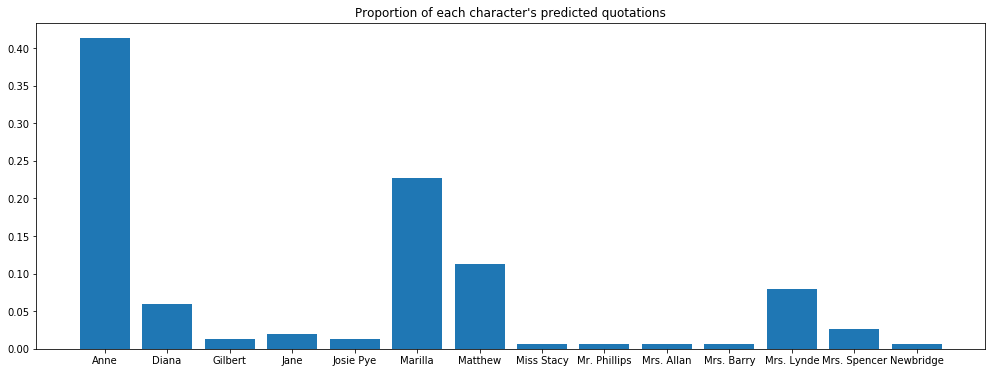

In [0]:
plt.figure(figsize=(17, 6))
plt.bar(ch_pr, n_pr)
plt.title("Proportion of each character's predicted quotations")

In [0]:
import pandas as pd

a = pd.DataFrame(n, ch)
b = pd.DataFrame(n_pr, ch_pr)
bar_data = pd.concat((a, b), axis = 1, join='outer', sort = True, ignore_index=True)
bar_data.fillna(0, inplace = True)

In [0]:
bar_data.rename(columns={0: "proportion_true", 1: "proportion_predicted"})

,proportion_true,proportion_predicted
Anne,0.426667,0.413333
Diana,0.060000,0.060000
Gilbert,0.013333,0.013333
Jane,0.013333,0.020000
Josie Pye,0.020000,0.013333
Marilla,0.240000,0.226667
Matthew,0.093333,0.113333
Miss Stacy,0.000000,0.006667
Mr. Phillips,0.006667,0.006667
Mrs. Allan,0.006667,0.006667


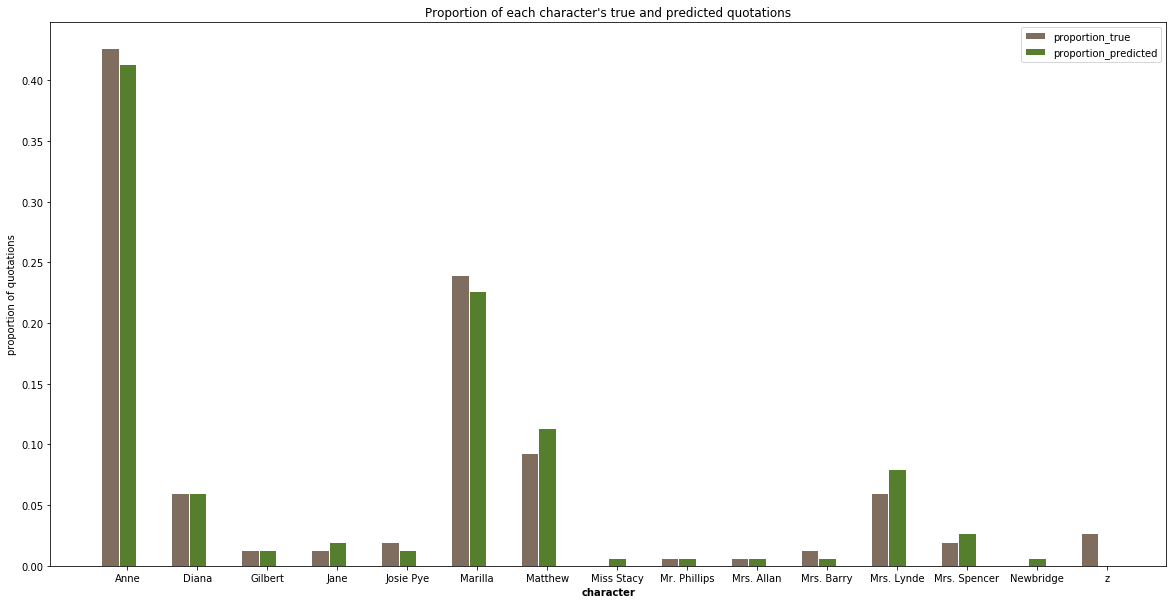

In [0]:
#code for plot from https://python-graph-gallery.com/11-grouped-barplot/
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20, 10))
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = bar_data.iloc[:,0]
bars2 = bar_data.iloc[:,1]
 
# Set position of bar on X axis
r1 = np.arange(len(bar_data.index))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='proportion_true')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='proportion_predicted')
 
# Add xticks on the middle of the group bars
plt.xlabel('character', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], bar_data.index)
plt.ylabel('proportion of quotations')
 
# Create legend & Show graphic
plt.title("Proportion of each character's true and predicted quotations")
plt.legend()
plt.show()


In [0]:
# #test accuracy two-sieve approach
# #first split book into chapters: #leave commented, only run once!
# import re
# import codecs
# gables_full_text = open("gables.txt", "r")
# gables_str = gables_full_text.read()
# nums = ["I", "II","III","IV","V", "VI", "VII", "VIII", "IX", "X", "XI", "XII", "XIII","XIV", "XV", "XVI", "XVII", "XVIII", "XIX", "XX", "XXI", "XXII", "XXIII", "XXIV", "XXV", "XXVI","XXVII" ,"XXVIII","XXIX", "XXX", "XXXI", "XXXII", "XXXIII","XXXIV", "XXXV" ,"XXXVI", "XXXVII", "XXXVIII"]
# for i in range(len(nums)):
#   current_chap_index = re.search("CHAPTER {}\.".format(nums[i]), gables_str).span()[0]
#   if i<len(nums)-1:
#     next_chap_index = re.search("CHAPTER {}\.".format(nums[i+1]), gables_str).span()[0]
#     with codecs.open("gables_by_chapter/gables_chapter{}.txt".format(i+1), "w", "ISO-8859-1") as f:
#       f.write(gables_str[current_chap_index: next_chap_index])
#   else:
#     with codecs.open("gables_by_chapter/gables_chapter{}.txt".format(i+1), "w", "ISO-8859-1") as f:
#       f.write(gables_str[current_chap_index:])
#   # print(re.search("CHAPTER {}".format(i), gables_str))

In [0]:
def extract_quotes_from_chapter_output():
  quotes = []
  labels = []
  for i in range(1, 39):
    filename = "gables_output/gables_chapter{}.txt.out".format(i)
    file = open(filename, "r")
    file_string = file.read()
    for u_quote in file_string[re.search('Extracted quotes:', file_string).span()[0]:].split("[")[1:]:
      # print(u_quote)
      # print("next")
      text_index = re.search("Text", u_quote).span()[0]
      speaker_index = re.search("Speaker", u_quote).span()[0]
      # print(text_index, speaker_index)
      # print()
      quotes.append(u_quote[text_index+6: text_index+6 + re.search('S', u_quote[text_index+6:]).span()[0]-2])
      labels.append(u_quote[speaker_index+8: speaker_index+8 + re.search(']', u_quote[speaker_index+8:]).span()[0]])
  return quotes, labels

In [0]:
quotes, labels = extract_quotes_from_chapter_output()

In [0]:
# anno_frame_st = pd.DataFrame({"sentences": quotes, "targets": labels})
# anno_frame_st = anno_frame_st.sample(frac=1).reset_index(drop=True)
# anno_frame_st.to_csv("shuffled_annotable_gables_st.csv")

In [0]:
anno_frame_st = pd.read_csv("shuffled_annotable_gables_st.csv")

In [122]:
anno_frame_st['sentences'][32]

'but I know I\ncouldn’t keep still. I’d be popping up every minute or so to see where I\nwas and if I wasn’t drifting too far out. And you know, Anne, that would\nspoil the effect.”'

In [0]:
target_true_st = ['Anne', 'Diana', 'Anne', 'Anne', 'Rachel', 'Matthew', 'Anne', 'Unknown', 'Diana', 'Marilla', 'Anne', 'Anne', 'Marilla', \
                  'Diana', "Josephine Barry", 'Anne', 'Anne', 'Marilla','Anne', 'Anne', 'Anne', 'Matthew', 'Anne', 'Anne', 'Anne', \
                  'Anne', 'Anne', 'Marilla', 'Anne', 'Unknown', 'Marilla', 'Anne', 'Jane Andrews']

# len(target_true_st)

In [125]:
list(anno_frame_st["targets"][:len(target_true_st)])

['Marilla',
 'Diana',
 'Marilla',
 'she',
 'Lynde',
 'Matthew Cuthbert',
 'Diana',
 'Rachel',
 'Julia Bell',
 'Marilla',
 'Anne',
 'Anne',
 'Anne',
 'Diana',
 'Marilla Cuthbert',
 'Anne',
 'Anne',
 'Anne Shirley',
 'Josephine Barry',
 'Unknown',
 'Anne',
 'Matthew Cuthbert',
 'Matthew',
 'her',
 'Anne Shirley',
 'Anne Shirley',
 'Anne Shirley',
 'Marilla',
 'Unknown',
 'Marilla',
 'Diana Barry',
 'her',
 'Jane Andrews']

In [130]:
def accuracy_checker(target_pre, target_true, n):
  total_corr = 0
  for i in range(len(target_pre)):
    if target_pre[i]=="Anne Shirley":
      target_pre[i] = "Anne"
    elif target_pre[i]=="Matthew Cuthbert":
      target_pre[i] = "Matthew"
    elif target_pre[i]=="Diana Barry":
      target_pre[i] = "Diana"
    elif target_pre[i] == "Marilla Cuthbert":
      target_pre[i] = "Marilla"
    elif target_pre[i] == "Lynde" or target_pre[i]=="Mrs. Lynde":
      target_pre[i] = "Rachel"
    elif target_pre[i] == "Ms. Barry":
      target_pre[i] = "Josephine Barry"
  if len(target_pre[:n])!=len(target_true):
    print("mismatched lengths, check")
  for i in range(len(target_pre[:n])):
    if target_true[i] == target_pre[i]:
      total_corr+=1
    elif target_true[i]!=target_pre[i]:
      print(target_true[i], target_pre[i])
  return total_corr/n, target_true.count("Anne")/len(target_true)

accuracy_checker(list(anno_frame_st["targets"]), target_true_st, len(target_true_st))

Anne Marilla
Anne Marilla
Anne she
Lynde Rachel
Anne Diana
Unknown Rachel
Diana Julia Bell
Marilla Anne
Ms. Barry Marilla
Marilla Anne
Anne Josephine Barry
Anne Unknown
Anne Matthew
Anne her
Anne Unknown
Unknown Marilla
Marilla Diana
Anne her


(0.45454545454545453, 0.5454545454545454)